4.2\. Find the outer product of the following two vecotrs (10 MINUTES)

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins

In [7]:
import numpy as np

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

outer_matrix = np.outer(u, v)

nested_matrix = np.zeros((len(u), len(v)))
for i in range(len(u)):
    for j in range(len(v)):
        nested_matrix[i, j] = u[i] * v[j]

numpy_matrix = u[:,np.newaxis]*v[np.newaxis,:]

print(f"The results with different methods to obtain matrixes are:\n -> With uoter product {outer_matrix},\n -> With nested for cylce: {nested_matrix},\n -> With broadcasting operations: {numpy_matrix}")

The results with different methods to obtain matrixes are:
 -> With uoter product [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]],
 -> With nested for cylce: [[ 2.  4.  6.  8.]
 [ 6. 12. 18. 24.]
 [10. 20. 30. 40.]
 [14. 28. 42. 56.]],
 -> With broadcasting operations: [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


10.4\. **Monte Carlo integration in high dimension** (30 MINUTES)

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere

In [29]:
import numpy as np

def function(x_vector):
    return (np.sum(x_vector**2) <= 1)

# number of points to sample for the Montecarlo method
N = 10**5

# function to compute the area
def surface(d=2):
    z = 2*np.random.random(size=(N,d))-1   # generation of N random numbers in (-1, 1)
    var = np.array([function(xi) for xi in z]) # initializing the approximate area of the circle
    Area = np.sum(var)/N
    return (2**d)*Area

print('The area of a 2d circle is:', surface(2))
print('The area of a 10d circle is:', surface(10))

The area of a 2d circle is: 3.14212
The area of a 10d circle is: 2.42688


9.5\. **FFT of an image** (30 MINUTES)

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

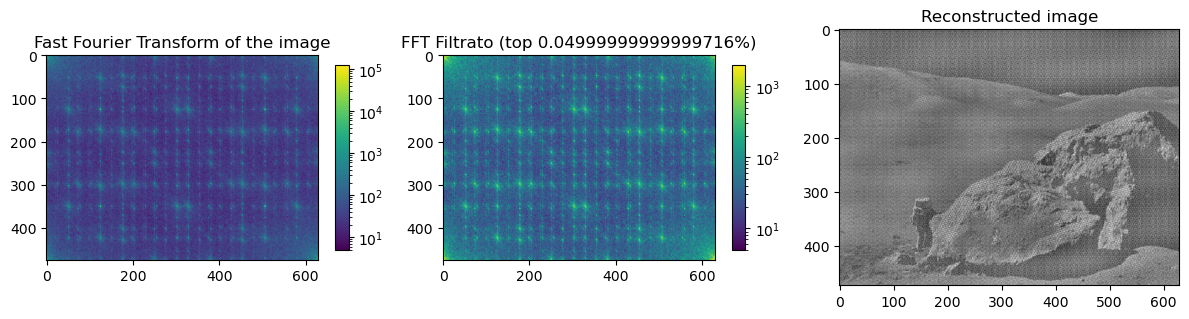

In [7]:
import numpy as np 
from scipy import fftpack
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# load of the image
image = plt.imread('C:\\Users\\NickBello\\Desktop\\phyton_shit\\moonlanding.png').astype(float)

# Fast Fourier transform
fft_image = fftpack.fft2(image)
fft_power = np.abs(fft_image)

# plot of the figure
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(fft_power, norm=LogNorm(vmin=5))
plt.title('Fast Fourier Transform of the image')
plt.colorbar(shrink=0.5, aspect=20*0.7)

# filtering the image creating a copy, avoiding to work with the original
copy_fft_image = fft_image.copy()
percentile_to_keep = 99.95
threshold = np.percentile(fft_power, percentile_to_keep)
mask = fft_power < threshold 
filtered = mask*fft_image

# plot of the filtered image
plt.subplot(132)
plt.imshow(np.abs(filtered), norm=LogNorm(vmin=5))
plt.title(f'FFT Filtrato (top {100 - 99.95}%)')
plt.colorbar(shrink=0.5, aspect=20*0.7)

reconstructed_image = fftpack.ifft2(filtered).real

# plot of the reconstructed image
plt.subplot(133)
plt.imshow(reconstructed_image, plt.cm.gray)
plt.title('Reconstructed image')
plt.tight_layout()
plt.show()

7.3\. **Profile plot** (30 MINUTES)

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
! wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot